In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [2]:
# Reading data from the dataset using file path
df = pd.read_csv('../ML_Music_Genre_Classification/Data/features_3_sec.csv')
print(df.head())
df.shape

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05

(9990, 60)

In [3]:
# Data Preprocessing 
# Dropping unwanted labels
df = df.drop(labels='filename', axis=1)

# Extracting the features
class_list = df.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)
labels = convertor.classes_

# Convert target labels to one-hot encoded format
y = to_categorical(y)

# Scaling the features
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
# FFNN Model Architecture, Compilation and Training
ffnn_model = Sequential()
ffnn_model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
ffnn_model.add(Dropout(0.2))
ffnn_model.add(Dense(256, activation='relu'))
ffnn_model.add(Dropout(0.2))
ffnn_model.add(Dense(128, activation='relu'))
ffnn_model.add(Dropout(0.2))
ffnn_model.add(Dense(64, activation='relu'))
ffnn_model.add(Dropout(0.2))
ffnn_model.add(Dense(len(labels), activation='softmax'))

ffnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ffnn_history =ffnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=128)

Epoch 1/150
63/63 [==============================] - 2s 10ms/step - loss: 1.5862 - accuracy: 0.4257 - val_loss: 1.0210 - val_accuracy: 0.6421
Epoch 2/150
63/63 [==============================] - 0s 7ms/step - loss: 1.0838 - accuracy: 0.6280 - val_loss: 0.8245 - val_accuracy: 0.7177
Epoch 3/150
63/63 [==============================] - 1s 9ms/step - loss: 0.8822 - accuracy: 0.7013 - val_loss: 0.6987 - val_accuracy: 0.7583
Epoch 4/150
63/63 [==============================] - 1s 10ms/step - loss: 0.7634 - accuracy: 0.7420 - val_loss: 0.6430 - val_accuracy: 0.7748
Epoch 5/150
63/63 [==============================] - 1s 11ms/step - loss: 0.6647 - accuracy: 0.7764 - val_loss: 0.5537 - val_accuracy: 0.8068
Epoch 6/150
63/63 [==============================] - 1s 11ms/step - loss: 0.5910 - accuracy: 0.8012 - val_loss: 0.5343 - val_accuracy: 0.8148
Epoch 7/150
63/63 [==============================] - 1s 10ms/step - loss: 0.5153 - accuracy: 0.8306 - val_loss: 0.4767 - val_accuracy: 0.8398
Epoch 8/

63/63 [==============================] - 0s 2ms/step


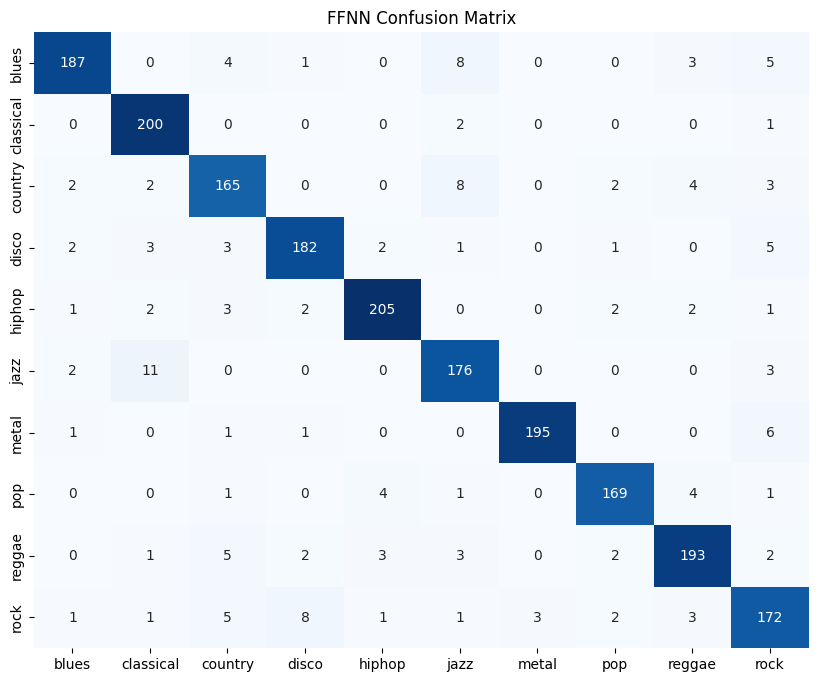

=================Classification Report FFNN====================
              precision    recall  f1-score   support

       blues       0.95      0.90      0.93       208
   classical       0.91      0.99      0.95       203
     country       0.88      0.89      0.88       186
       disco       0.93      0.91      0.92       199
      hiphop       0.95      0.94      0.95       218
        jazz       0.88      0.92      0.90       192
       metal       0.98      0.96      0.97       204
         pop       0.95      0.94      0.94       180
      reggae       0.92      0.91      0.92       211
        rock       0.86      0.87      0.87       197

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998



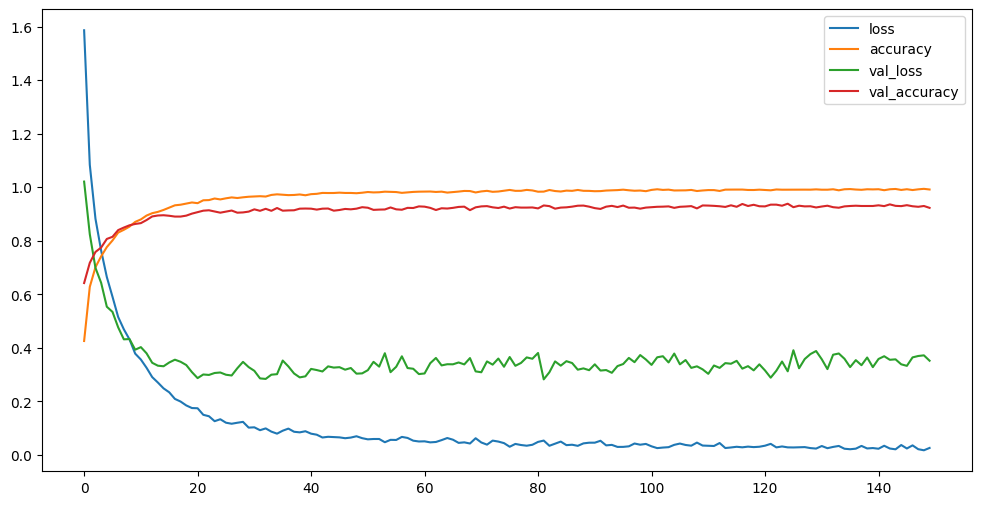

In [6]:
# Model Evaluation and Visualization
# Predict labels for the test set
y_pred = np.argmax(ffnn_model.predict(X_test), axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Create a DataFrame for the confusion matrix
ffnn_confusion_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(ffnn_confusion_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("FFNN Confusion Matrix")
plt.show()

# Generate the classification report
print("=================Classification Report FFNN====================")
class_report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=labels)
print(class_report)

print("===========================================================")
# Plot the training and validation accuracy
pd.DataFrame(ffnn_history.history).plot(figsize=(12, 6))
plt.show()

In [7]:
#KNN Model Training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

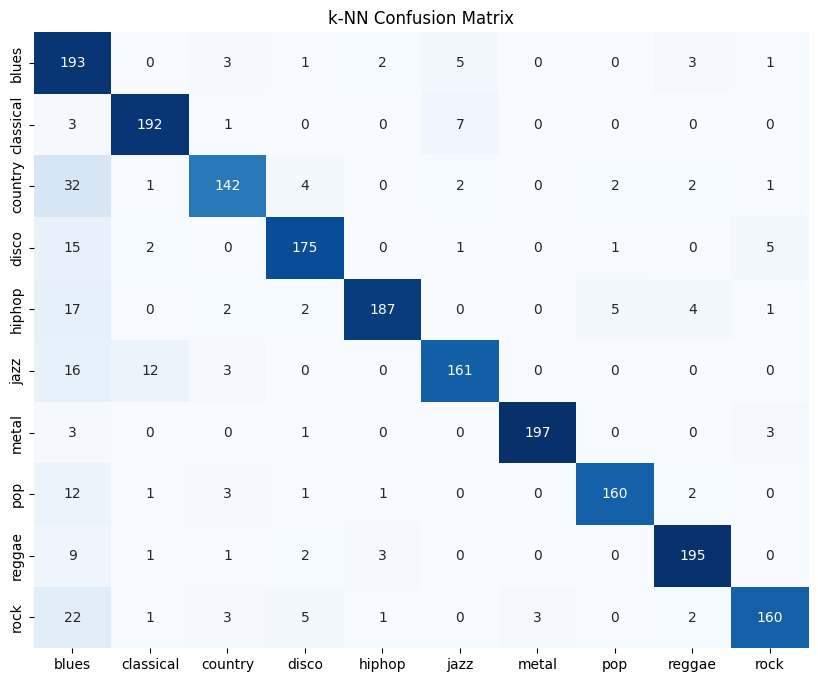

=================Classification Report KNN=====================
              precision    recall  f1-score   support

       blues       0.60      0.93      0.73       208
   classical       0.91      0.95      0.93       203
     country       0.90      0.76      0.83       186
       disco       0.92      0.88      0.90       199
      hiphop       0.96      0.86      0.91       218
        jazz       0.91      0.84      0.88       192
       metal       0.98      0.97      0.98       204
         pop       0.95      0.89      0.92       180
      reggae       0.94      0.92      0.93       211
        rock       0.94      0.81      0.87       197

    accuracy                           0.88      1998
   macro avg       0.90      0.88      0.89      1998
weighted avg       0.90      0.88      0.89      1998



In [8]:
# Model Evaluation and Visualization
# Predict labels for the test set
y_pred = knn_model.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Create a DataFrame for the confusion matrix
knn_confusion_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(knn_confusion_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("k-NN Confusion Matrix")
plt.show()

# Generate the classification report
print("=================Classification Report KNN=====================")
class_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=labels)
print(class_report)

In [9]:
# SVM Model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, np.argmax(y_train, axis=1))

SVC()

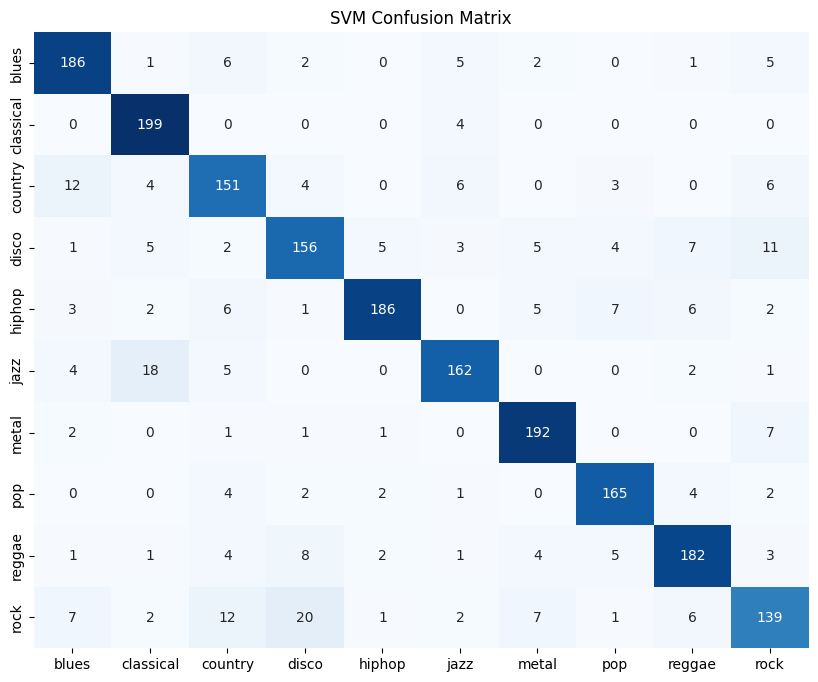

=================Classification Report SVM=====================
              precision    recall  f1-score   support

       blues       0.86      0.89      0.88       208
   classical       0.86      0.98      0.91       203
     country       0.79      0.81      0.80       186
       disco       0.80      0.78      0.79       199
      hiphop       0.94      0.85      0.90       218
        jazz       0.88      0.84      0.86       192
       metal       0.89      0.94      0.92       204
         pop       0.89      0.92      0.90       180
      reggae       0.88      0.86      0.87       211
        rock       0.79      0.71      0.75       197

    accuracy                           0.86      1998
   macro avg       0.86      0.86      0.86      1998
weighted avg       0.86      0.86      0.86      1998



In [10]:
# Predict labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# Create a DataFrame for the confusion matrix
svm_confusion_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(svm_confusion_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("SVM Confusion Matrix")
plt.show()

# Generate the classification report
print("=================Classification Report SVM=====================")
class_report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=labels)
print(class_report)

In [11]:
# Reshape the input data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(len(labels), activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=150, batch_size=128)

Epoch 1/150
63/63 [==============================] - 2s 19ms/step - loss: 1.2791 - accuracy: 0.5542 - val_loss: 0.9120 - val_accuracy: 0.6727
Epoch 2/150
63/63 [==============================] - 1s 16ms/step - loss: 0.8210 - accuracy: 0.7163 - val_loss: 0.6831 - val_accuracy: 0.7628
Epoch 3/150
63/63 [==============================] - 1s 16ms/step - loss: 0.6579 - accuracy: 0.7770 - val_loss: 0.6082 - val_accuracy: 0.7973
Epoch 4/150
63/63 [==============================] - 1s 19ms/step - loss: 0.5568 - accuracy: 0.8058 - val_loss: 0.5262 - val_accuracy: 0.8303
Epoch 5/150
63/63 [==============================] - 1s 15ms/step - loss: 0.4621 - accuracy: 0.8413 - val_loss: 0.4653 - val_accuracy: 0.8483
Epoch 6/150
63/63 [==============================] - 1s 24ms/step - loss: 0.3886 - accuracy: 0.8637 - val_loss: 0.4205 - val_accuracy: 0.8559
Epoch 7/150
63/63 [==============================] - 1s 21ms/step - loss: 0.3392 - accuracy: 0.8851 - val_loss: 0.4029 - val_accuracy: 0.8704
Epoch 

63/63 [==============================] - 0s 2ms/step


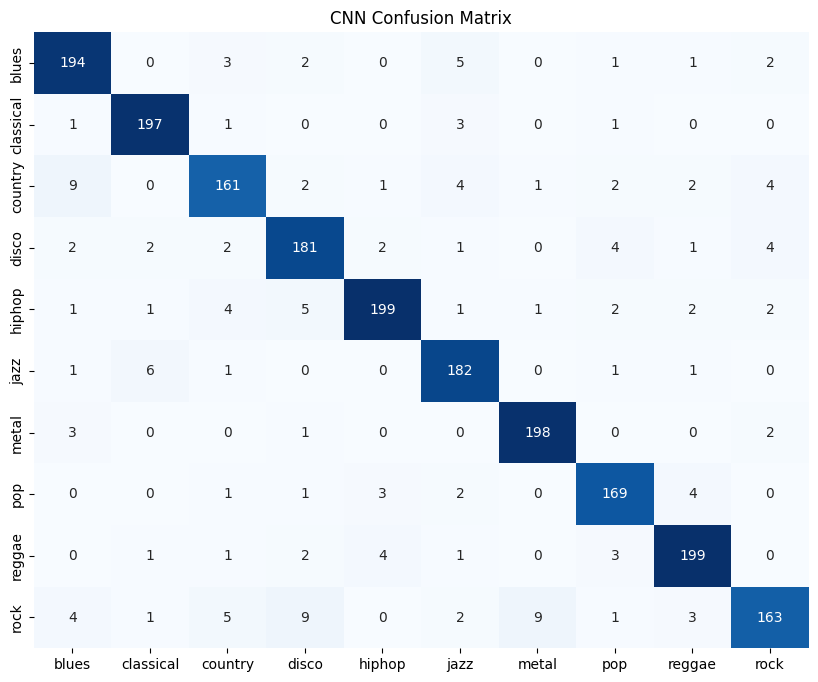

=================Classification Report CNN=====================
              precision    recall  f1-score   support

       blues       0.90      0.93      0.92       208
   classical       0.95      0.97      0.96       203
     country       0.90      0.87      0.88       186
       disco       0.89      0.91      0.90       199
      hiphop       0.95      0.91      0.93       218
        jazz       0.91      0.95      0.93       192
       metal       0.95      0.97      0.96       204
         pop       0.92      0.94      0.93       180
      reggae       0.93      0.94      0.94       211
        rock       0.92      0.83      0.87       197

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998



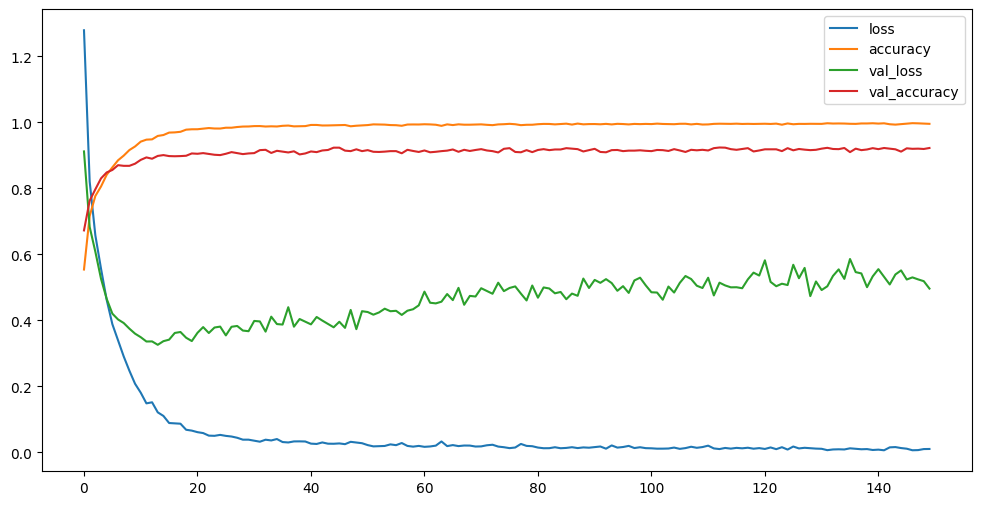

In [12]:
# Predict labels for the test set
y_pred = np.argmax(cnn_model.predict(X_test.reshape(-1, X.shape[1], 1, 1)), axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# Create a DataFrame for the confusion matrix
cnn_confusion_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_confusion_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("CNN Confusion Matrix")
plt.show()

print("=================Classification Report CNN=====================")
# Generate the classification report
class_report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=labels)
print(class_report)

print("===========================================================")
# Plot the training and validation accuracy
pd.DataFrame(cnn_history.history).plot(figsize=(12, 6))
plt.show()


63/63 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.9224


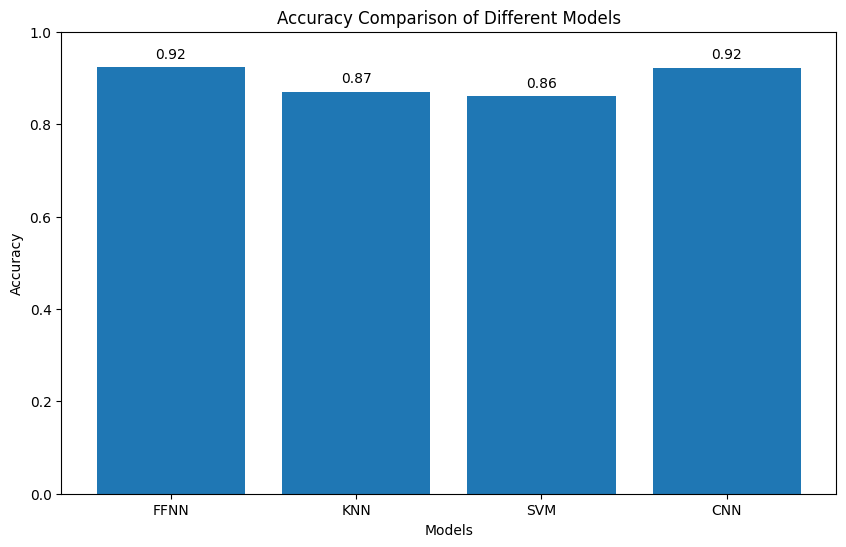

In [13]:

# Accuracy list to store the accuracy values
accuracies = []

# FFNN model evaluation
ffnn_accuracy = ffnn_model.evaluate(X_test, y_test)[1]
accuracies.append(ffnn_accuracy)

# KNN model evaluation
knn_accuracy = knn_model.score(X_test, y_test)
accuracies.append(knn_accuracy)

# SVM model evaluation
svm_accuracy = svm_model.score(X_test, np.argmax(y_test, axis=1))
accuracies.append(svm_accuracy)

# CNN model evaluation
cnn_accuracy = cnn_model.evaluate(X_test.reshape(-1, X.shape[1], 1), y_test)[1]
accuracies.append(cnn_accuracy)

# Model names for the x-axis of the graph
model_names = ['FFNN', 'KNN', 'SVM', 'CNN']

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.ylim([0, 1])  # Set the y-axis limits
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')

# Add accuracy numbers as labels on the side of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center')

plt.show()